In [380]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

Reading and Understanding data

In [381]:
df = pd.read_csv('day.csv')

In [382]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [383]:
df.shape

(730, 16)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [385]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Check if any duplicate entries:

In [386]:
df.duplicated().sum()

0

Drop instant column as it is just having index number of the dataset:

In [387]:
df.drop(['instant'],axis=1,inplace=True)

In [388]:
df.drop(['dteday',], axis=1, inplace=True)

In [389]:
df.drop(['casual'], axis=1, inplace=True)

In [390]:
df.drop(['registered'], axis=1, inplace=True)

In [391]:
df.drop(['atemp'], axis=1, inplace=True)

In [392]:
df.shape

(730, 11)

In [393]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### Visualise the Data-EDA

In [394]:
def univariate(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(10,3))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1])
        plt.show()

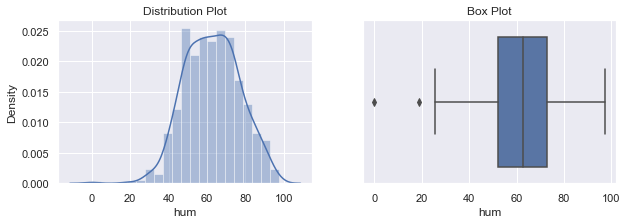

In [395]:
univariate(df=df,col='hum')

Humudity column data is right skewed normal distribution with mean as 62

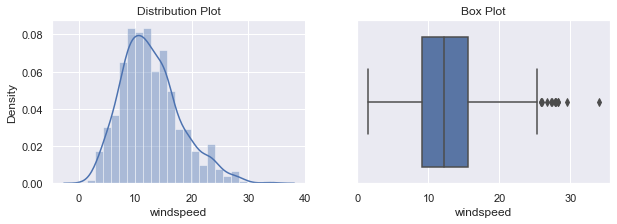

In [396]:
univariate(df=df,col='windspeed')

windspeed is normally distributed between 1 to 30 with around mean of 12

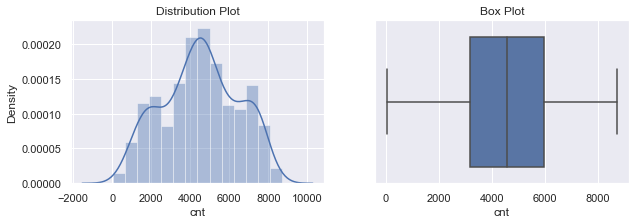

In [397]:
univariate(df=df,col='cnt')

Data is normally distributed in between 0 to 10000, with around mean as 4508

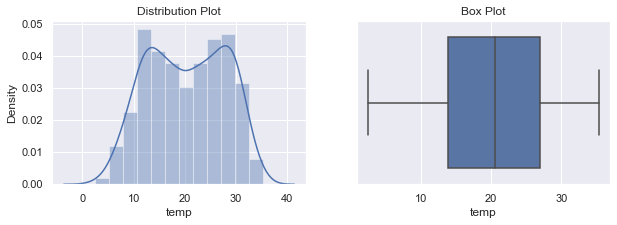

In [398]:
univariate(df=df,col='temp')

Temp column data is right skewed normal distribution with mean of 20

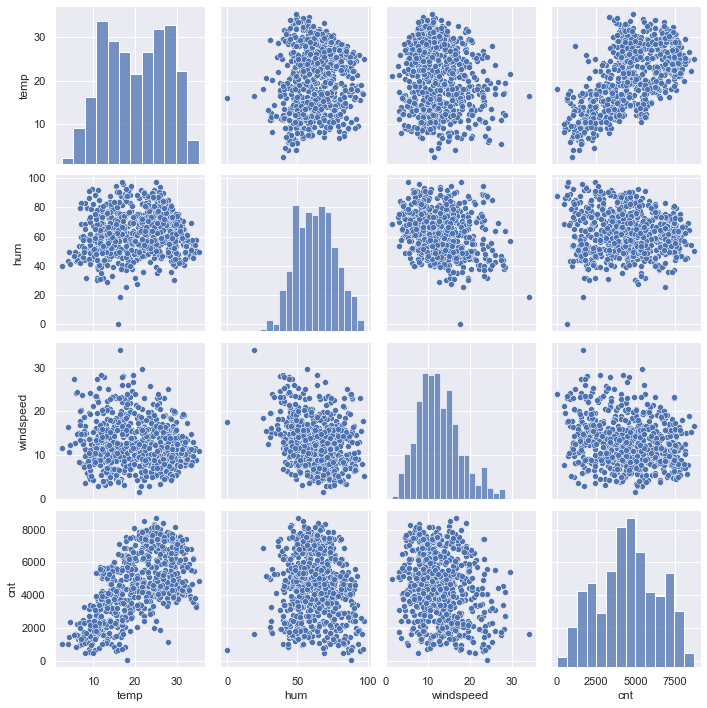

In [399]:
sns.pairplot(df[['temp','hum','windspeed','cnt']])
plt.show()

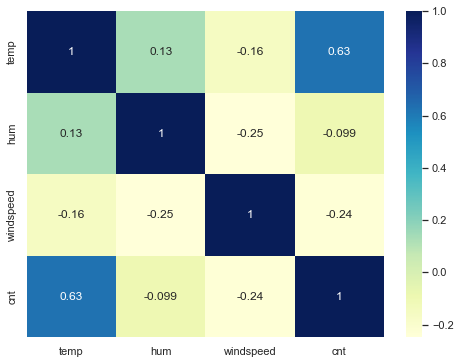

In [400]:
corr_df= df[['temp','hum','windspeed','cnt']].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df,xticklabels=corr_df.columns.values,yticklabels=corr_df.columns.values,annot= True,cmap="YlGnBu")
plt.show()

From above pair plot temp variable has the highest (0.63) correlation with target variable 'cnt'. 

Visualise the Categorical Variables:

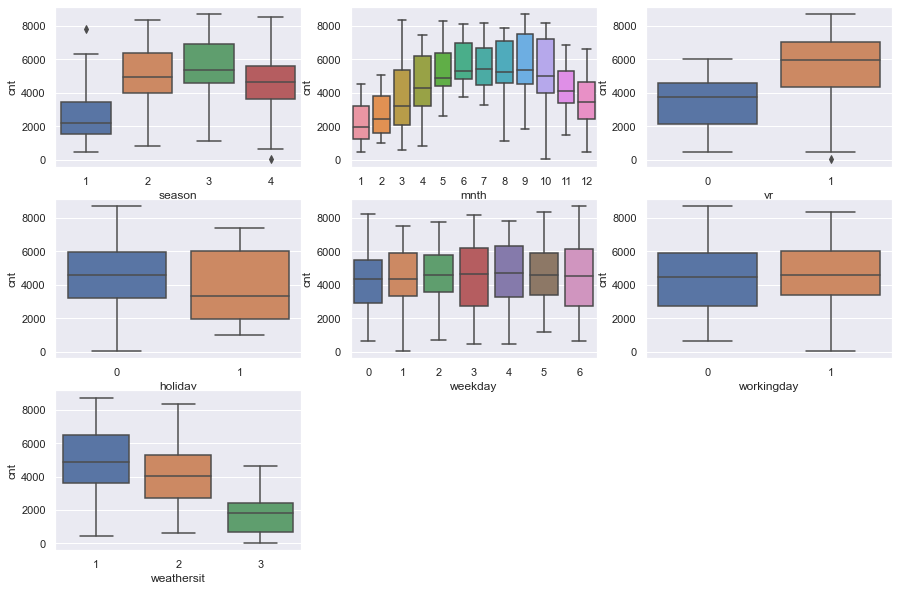

In [401]:
plt.figure(figsize=(15, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

##### Data Preparation:

In [402]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

The below categorical columns are having following catecteristics and can be maped with the below values:
season column is having four seasons as (1:spring, 2:summer, 3:fall, 4:winter)
mnth column is having 12 categorical values denoting for months Jan to Dec
weathersit is having for categorical values (1: Clear_FewClouds, 2: Mist_Cloudy, 3: LightSnow_LightRain, 4: HeavyRain_IcePallets)
weekday column having 7 varibles ( 0 to 6 ) denoting (0: Sun, 1: Mon 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat)
yr, holiday, workingday are having binary values. So we will not map these columns


In [403]:
# maped the season column according to descripttions
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# maped the weekday column according to descriptin
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})


# maped mnth column values (1 to 12 ) as (jan to dec) respectively
df['mnth'] = df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

#  maped weathersit column
df['weathersit'] = df['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

In [404]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,Clear_FewClouds,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,Clear_FewClouds,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,Clear_FewClouds,9.305237,43.6957,12.522300,1600


Creating the Dummy Variables:

In [405]:
df=pd.get_dummies(data=df, columns=['season', 'mnth','yr','weekday','weathersit'], drop_first = True)

In [406]:
df.shape

(730, 29)

Splitting the Data into Training and Testing Sets:

In [407]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [408]:
#check the shape of train and test dataframe
print("Train dataframe : ",df_train.shape)
print("Test dataframe : ",df_test.shape)

Train dataframe :  (510, 29)
Test dataframe :  (219, 29)


We can apply scaller to all columns except dummy variables

In [409]:
scaler = StandardScaler()

In [410]:
scale_columns=['cnt','temp','hum','windspeed']
df_train[scale_columns] = scaler.fit_transform(df_train[scale_columns])
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
576,0,1,1.231731,0.516433,-0.330615,1.399629,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
426,0,0,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,-1.379511,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,-0.136589,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [411]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
count,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,-2.757054e-16,-3.459107e-16,-2.333645e-16,-5.398732e-17,0.243137,0.245098,0.24902,0.096078,...,0.080392,0.507843,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,0.294988,...,0.272166,0.500429,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


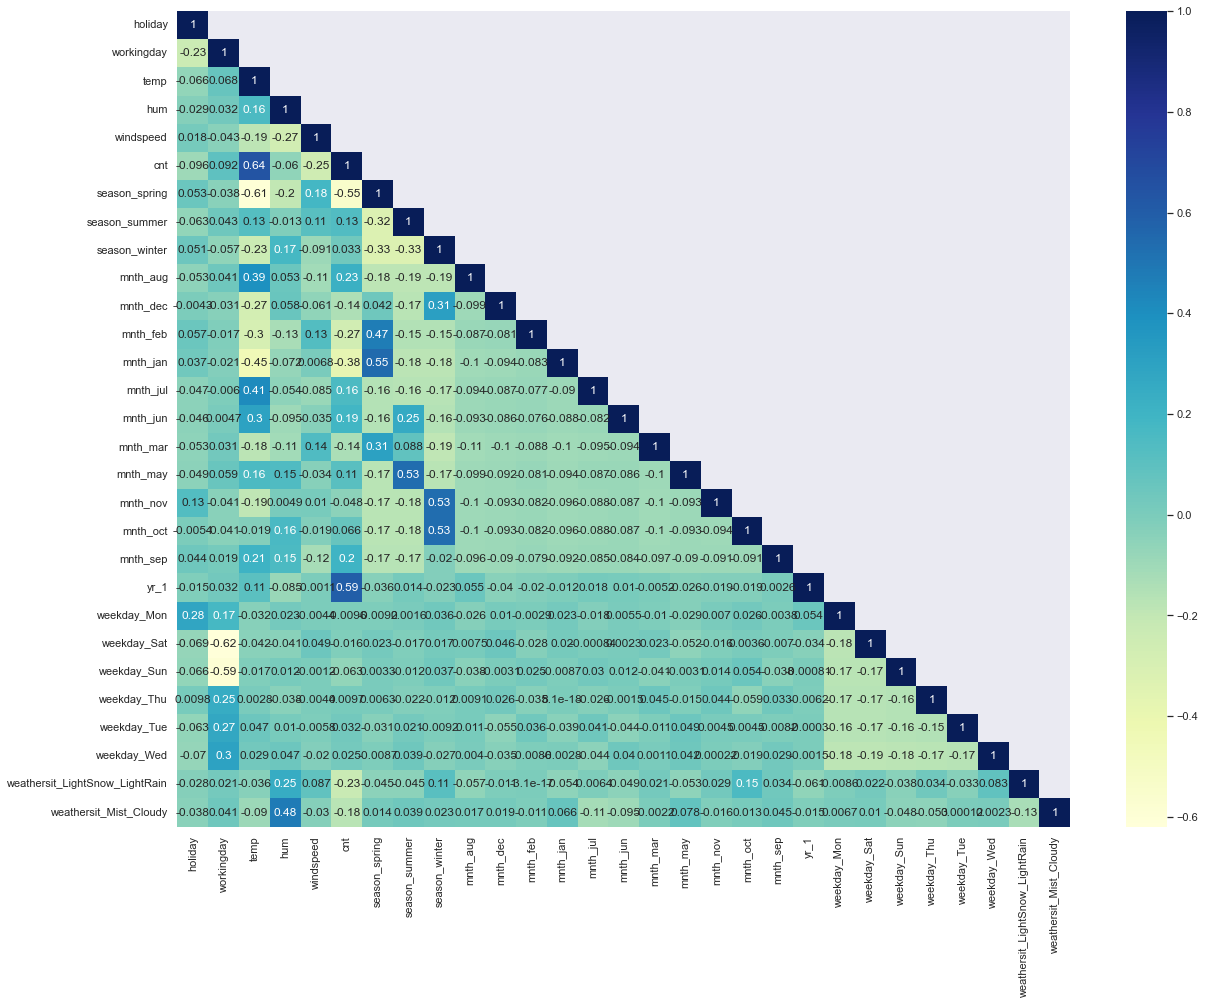

In [412]:
#Plotting correlation matrix for bb_train data
mask=np.array(df_train.corr())
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), mask=mask, annot = True, cmap="YlGnBu")
plt.show()

temp is correlated to cnt the most:

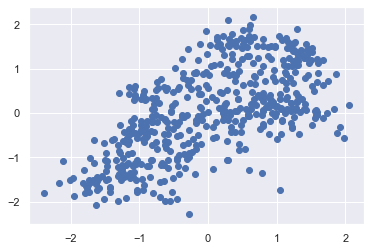

In [413]:
#Pairplot for temp vs cnt.
plt.figure(figsize=[6,4])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

We can temp as the first variable and we'll try to fit a regression line to that.

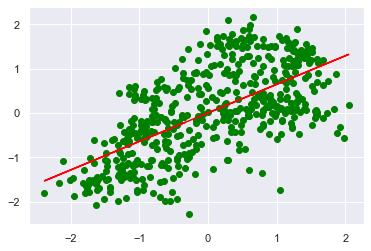

In [414]:
plt.plot(df_train.temp, df_train.cnt, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df_train.temp, df_train.cnt, 1)

#use red as color for regression line
plt.plot(df_train.temp, m*df_train.temp+b, color='red')

Divide the data into X and Y sets for the model building: 

In [415]:
y_train = df_train.pop('cnt')
X_train = df_train

In [416]:
X_train.shape

(510, 28)

In [417]:
y_train.shape

(510,)

Build a linear model:

Fitting a regression line using statsmodels.:

In [418]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Create first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [419]:
lr.params

const                            -0.440088
holiday                          -0.338715
workingday                        0.048700
temp                              0.453072
hum                              -0.098301
windspeed                        -0.140963
season_spring                    -0.214639
season_summer                     0.172591
season_winter                     0.471747
mnth_aug                          0.064197
mnth_dec                         -0.203171
mnth_feb                         -0.143876
mnth_jan                         -0.279788
mnth_jul                         -0.179835
mnth_jun                         -0.013248
mnth_mar                          0.004658
mnth_may                          0.106697
mnth_nov                         -0.186526
mnth_oct                          0.033576
mnth_sep                          0.361274
yr_1                              1.034512
weekday_Mon                      -0.093179
weekday_Sat                       0.046493
weekday_Sun

In [420]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          8.74e-182
Time:                        11:53:46   Log-Likelihood:                -234.21
No. Observations:                 510   AIC:                             524.4
Df Residuals:                     482   BIC:                             643.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05

In [421]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_mar', 1)

In [422]:
# Adding the constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [423]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          8.33e-183
Time:                        11:53:46   Log-Likelihood:                -234.22
No. Observations:                 510   AIC:                             522.4
Df Residuals:                     483   BIC:                             636.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [424]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_jun', 1)

In [425]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          7.84e-184
Time:                        11:53:46   Log-Likelihood:                -234.23
No. Observations:                 510   AIC:                             520.5
Df Residuals:                     484   BIC:                             630.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [426]:
# We have high P value for mnth_October feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_oct', 1)

In [427]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          7.40e-185
Time:                        11:53:46   Log-Likelihood:                -234.26
No. Observations:                 510   AIC:                             518.5
Df Residuals:                     485   BIC:                             624.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [428]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Thu', 1)

In [429]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          7.88e-186
Time:                        11:53:47   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             516.9
Df Residuals:                     486   BIC:                             618.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [430]:
# We have high P value for weekday_Sunday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_Sun', 1)

In [431]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          7.88e-186
Time:                        11:53:47   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             516.9
Df Residuals:                     486   BIC:                             618.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [432]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,6.63
5,season_spring,5.03
2,temp,4.35
7,season_winter,3.44
6,season_summer,3.13
11,mnth_jan,2.55
22,weathersit_Mist_Cloudy,2.36
16,yr_1,2.10
8,mnth_aug,2.01
10,mnth_feb,1.98


The variable workingday has a significantly high VIF (6.63) and a high p-value (0.457) as well. Hence, this variable isn't of much use and should be dropped.

In [433]:
X_train=X_train.drop('workingday', 1)

In [434]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.09e-183
Time:                        11:53:47   Log-Likelihood:                -242.23
No. Observations:                 510   AIC:                             530.5
Df Residuals:                     487   BIC:                             627.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [435]:
# We have high P value for weekday_Saturday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_Sat', 1)


In [436]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          5.01e-184
Time:                        11:53:47   Log-Likelihood:                -243.98
No. Observations:                 510   AIC:                             532.0
Df Residuals:                     488   BIC:                             625.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [437]:
# We have high P value for mnth_August feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_aug', 1)

In [438]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          5.69e-185
Time:                        11:53:47   Log-Likelihood:                -244.29
No. Observations:                 510   AIC:                             530.6
Df Residuals:                     489   BIC:                             619.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [439]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Wed', 1)

In [440]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          7.42e-186
Time:                        11:53:47   Log-Likelihood:                -244.77
No. Observations:                 510   AIC:                             529.5
Df Residuals:                     490   BIC:                             614.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [441]:
# We have high P value for mnth_May feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_may', 1)

In [442]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.4
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.56e-186
Time:                        11:53:47   Log-Likelihood:                -245.78
No. Observations:                 510   AIC:                             529.6
Df Residuals:                     491   BIC:                             610.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [443]:
# We have high P value for mnth_Feb feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_feb', 1)

In [444]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.73e-187
Time:                        11:53:47   Log-Likelihood:                -247.20
No. Observations:                 510   AIC:                             530.4
Df Residuals:                     492   BIC:                             606.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [445]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.82
4,season_spring,2.80
6,season_winter,2.71
16,weathersit_Mist_Cloudy,2.13
12,yr_1,2.04
10,mnth_nov,1.84
2,hum,1.79
8,mnth_jan,1.78
7,mnth_dec,1.54
5,season_summer,1.48


The model lr_11 looks good because there are no features which is >0.05 and all the features VIF is less than 3.

Residual Analysis of the train data:

In [446]:
y_train_pred = lr_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

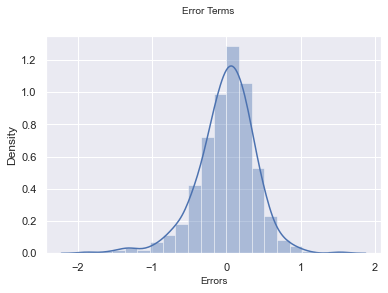

In [447]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)

Making Predictions Using the Final Model:

In [448]:
num_columns=['cnt','temp','hum','windspeed']
df_test[num_columns] = scaler.transform(df_test[num_columns])

In [449]:
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.096083,-0.081388,-0.043731,0.031073,0.255708,0.264840,0.232877,0.059361,...,0.086758,0.479452,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.188034,0.459904,1.035793,1.022197,0.942916,0.973536,0.437258,0.442259,0.423633,0.236840,...,0.282125,0.500722,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,-2.174744,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.809372,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.094973,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.983209,0.641963,0.485055,0.709202,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.981904,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [450]:
y_test = df_test.pop('cnt')
X_test = df_test

In [451]:
X_test.shape

(219, 28)

In [452]:
y_test.shape

(219,)

In [453]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [454]:
X_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'yr_1', 'weekday_Mon', 'weekday_Tue',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [455]:
X_test_m.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'yr_1', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [456]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['mnth_mar','mnth_jun','mnth_oct','weekday_Thu','weekday_Sun','workingday','weekday_Sat',
             'mnth_aug','weekday_Wed','mnth_may','mnth_feb']
X_test_m = X_test_m.drop(drop_cols, axis = 1)
y_pred_m = lr_11.predict(X_test_m)

Let's now plot the graph for actual versus predicted values:

Text(0, 0.5, 'y_pred')

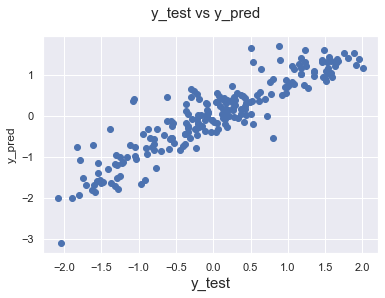

In [457]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 15)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred', fontsize = 12)

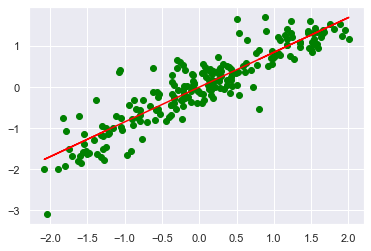

In [462]:
plt.plot(y_test, y_pred_m, 'o', color='green')
m, b = np.polyfit(y_test, y_pred_m, 1)
plt.plot(y_test, m*y_test+b, color='red')

R-squared score:

In [458]:
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred_m))

Train R-Score:  0.8456417428289594
Test R-Score:  0.8224713983062809


In [459]:
X_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'yr_1', 'weekday_Mon', 'weekday_Tue',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

Significant variables to predict the demand for shared bikes are 'holiday','temp','hum','windspeed','Spring'(Season),'Summer'(Season),'Winter'(Season),'January'(months),'July'(months),'September'(months),'November'(months),'December'(months),'Year(2019)','Monday','Tuesday','Light Snow'(weathersit),'Mist Cloudy'(weathersit).